In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data_path = '/content/drive/MyDrive/COURSEW/Rsrch/'

In [3]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from Modules.data_processing import split_data, get_statistics, preprocess_books, shorten_sessions

In [4]:
n_sessions = 50000
# sorted_events = sample_data('data', 'events.csv')
sorted_events = pd.read_csv(data_path + 'data/sorted_events.csv')
ch_sorted_events, itm2idx = shorten_sessions(sorted_events, n_sessions=n_sessions)
train_df, val_df, test_df = split_data(ch_sorted_events)
replay_buf, data_stats = get_statistics(ch_sorted_events, train_df)

unique: 51112 min: 0 max: 51111


In [5]:
data_stats

,state_size,item_num
0,10,51112


In [6]:
%pip install trfl

In [7]:
from Modules.train import train, test, sas_train, sas_test

In [8]:
from Modules.misc import last_results, plot_validation

# DQN

In [9]:
arg_dict = {'r_click' : 0.2,
            'r_buy' : 1,
            'r_negative' : 1,
            'hidden_factor' : 64,
            'lr' : 0.001,
            'epoch' : 10,
            'batch_size' : 512,
            'neg' : 10,
            'discount' : 0.5
            }
results_dqn = []
losses_dqn = []
DQN_1, sess_DQN = train(data_stats, replay_buf, val_df, arg_dict=arg_dict, results=results_dqn, losses=losses_dqn)

Instructions for updating:
non-resource variables are not supported in the long term
/content/Modules/Model.py:219: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  self.seq = tf.compat.v1.layers.dropout(self.seq,
/content/Modules/SASRecModules.py:59: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  Q = tf.compat.v1.layers.dense(queries, num_units, activation=None)
/content/Modules/SASRecModules.py:60: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  K = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:61: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  V = tf.compat.v1.layers.dense(keys, num_units, activation=

NUM BATCHES in 1 EPOCH: 486
$$$$ STARTING EPOCH # 0 $$$$
the loss in 100th batch is: 4.593657
the loss in 200th batch is: 1.983056
the loss in 300th batch is: 1.459239
the loss in 400th batch is: 1.134223
#############################################################
total clicks: 27964, total purchase:1331
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 0.200000
clicks hr ndcg @ 5 : 0.000036, 0.000023
purchase hr and ndcg @5 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 0.800000
clicks hr ndcg @ 10 : 0.000143, 0.000056
purchase hr and ndcg @10 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 1.600000
clicks hr ndcg @ 15 : 0.000286, 0.000092
purchase hr and ndcg @15 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 1.800000
clicks hr ndcg @ 20 : 0.000322, 0.000101
purchase hr a

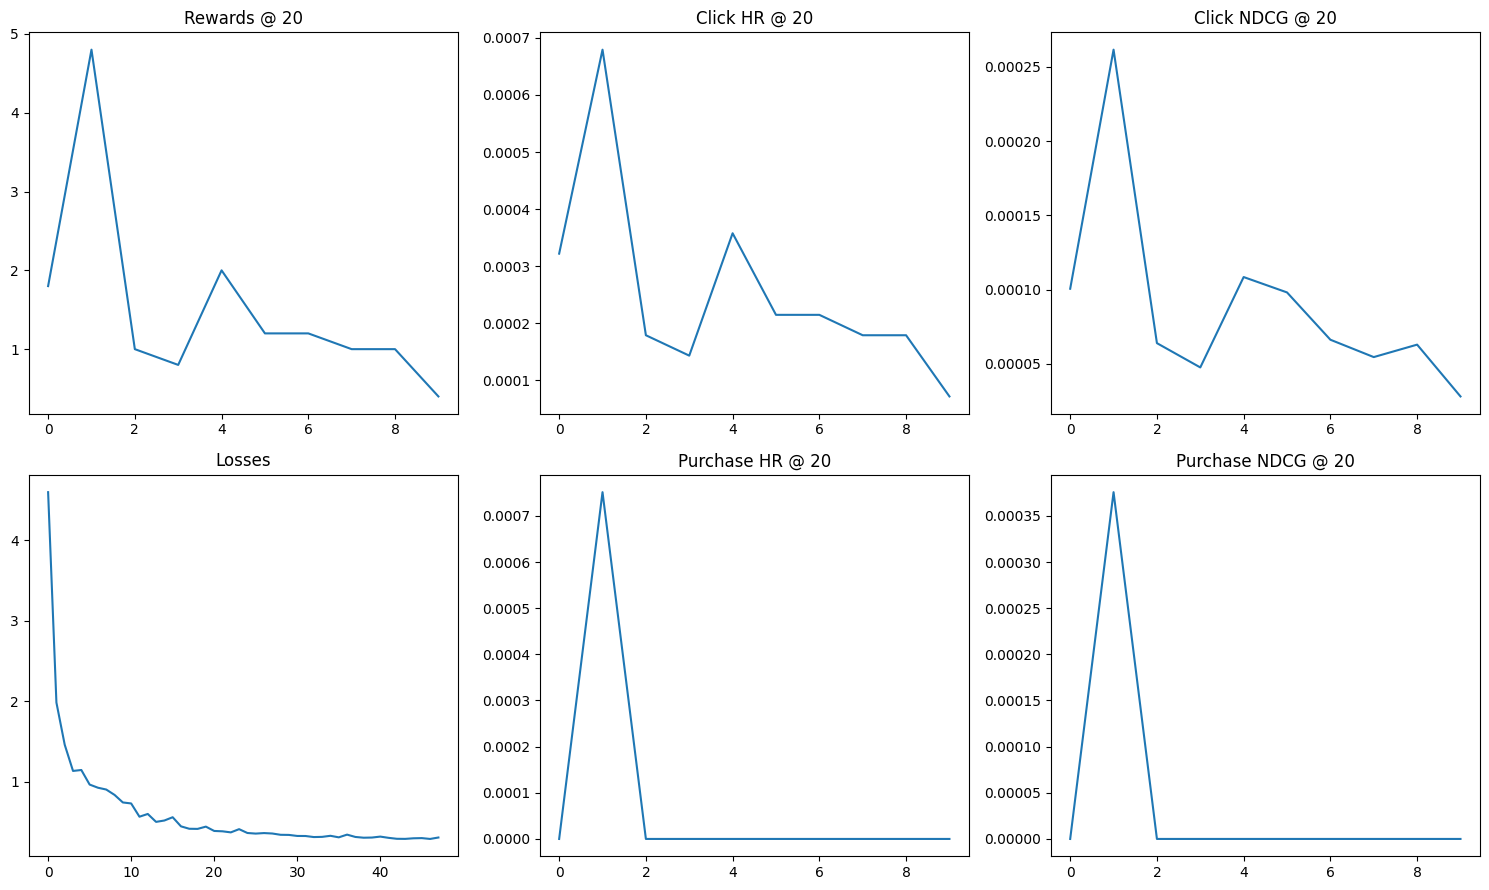

In [10]:
plot_validation(losses_dqn, results_dqn, at=20)

In [11]:
VAL_RESULTS_DQN = last_results(results_dqn)

In [12]:
test_results_DQN = []
test(sess_DQN, DQN_1, data_stats, test_df, test_results_DQN, data_dir=data_path + 'data/')

#############################################################
total clicks: 30867, total purchase:1468
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 0.800000
clicks hr ndcg @ 5 : 0.000130, 0.000077
purchase hr and ndcg @5 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 0.800000
clicks hr ndcg @ 10 : 0.000130, 0.000077
purchase hr and ndcg @10 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 1.000000
clicks hr ndcg @ 15 : 0.000162, 0.000086
purchase hr and ndcg @15 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 1.600000
clicks hr ndcg @ 20 : 0.000259, 0.000109
purchase hr and ndcg @20 : 0.000000, 0.000000
#############################################################


# SNQN

In [13]:

arg_dict = {'r_click' : 0.2,
            'r_buy' : 1,
            'r_negative' : 1,
            'hidden_factor' : 64,
            'lr' : 0.0025,
            'epoch' : 30,
            'batch_size' : 512,
            'neg' : 10,
            'discount' : 0.5
            }
results_snqn = []
losses_snqn = []
SNQN_1, sess_SNQN = train(data_stats, replay_buf, val_df, arg_dict=arg_dict, results=results_snqn, losses=losses_snqn, configuration='SNQN')

/content/Modules/Model.py:219: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  self.seq = tf.compat.v1.layers.dropout(self.seq,
/content/Modules/SASRecModules.py:59: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  Q = tf.compat.v1.layers.dense(queries, num_units, activation=None)
/content/Modules/SASRecModules.py:60: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  K = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:61: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  V = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:96: UserWarning: `tf.layers.dropout` is depre

NUM BATCHES in 1 EPOCH: 486
$$$$ STARTING EPOCH # 0 $$$$
the loss in 100th batch is: 13.449219
the loss in 200th batch is: 11.662287
the loss in 300th batch is: 12.162702
the loss in 400th batch is: 11.024471
#############################################################
total clicks: 27964, total purchase:1331
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 176.400000
clicks hr ndcg @ 5 : 0.019382, 0.015275
purchase hr and ndcg @5 : 0.051089, 0.040662
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 220.600000
clicks hr ndcg @ 10 : 0.024782, 0.017044
purchase hr and ndcg @10 : 0.061608, 0.044115
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 256.200000
clicks hr ndcg @ 15 : 0.029180, 0.018202
purchase hr and ndcg @15 : 0.069872, 0.046272
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 288.000000
clicks hr ndcg @ 20 : 0.032721, 0.019039
p

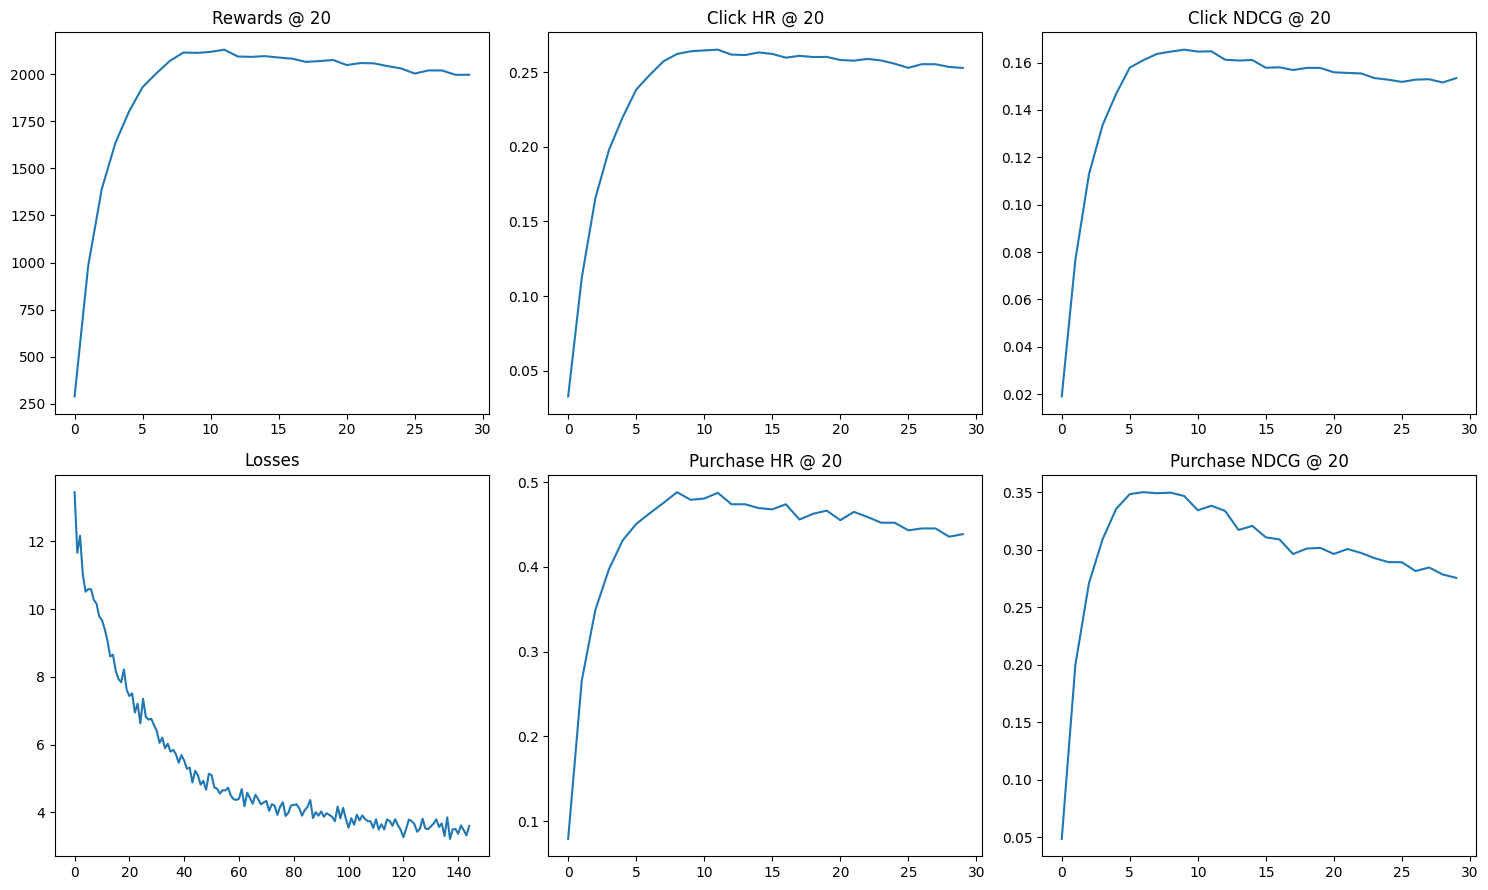

In [14]:
plot_validation(losses_snqn, results_snqn)

In [15]:
VAL_RESULTS_SNQN = last_results(results_snqn)

In [16]:
test_results_SNQN = []
test(sess_SNQN, SNQN_1, data_stats, test_df, test_results_SNQN, data_dir='/content/drive/MyDrive/COURSEW/Rsrch/data')

#############################################################
total clicks: 30867, total purchase:1468
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 1660.200000
clicks hr ndcg @ 5 : 0.183076, 0.137404
purchase hr and ndcg @5 : 0.361035, 0.274674
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 1958.200000
clicks hr ndcg @ 10 : 0.219846, 0.149398
purchase hr and ndcg @10 : 0.409401, 0.290602
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 2108.200000
clicks hr ndcg @ 15 : 0.238475, 0.154335
purchase hr and ndcg @15 : 0.433243, 0.296944
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 2203.800000
clicks hr ndcg @ 20 : 0.250721, 0.157228
purchase hr and ndcg @20 : 0.446866, 0.300158
#############################################################


# SA2C

In [17]:
# from Modules.data_processing import create_pop_dict

# create_pop_dict()

In [18]:
arg_dict = {'r_click' : 0.2,
            'r_buy' : 1,
            'r_negative' : 1,
            'hidden_factor' : 64,
            'lr' : 0.0025,
            'lr2' : 0.001,
            'epoch' : 30,
            'batch_size' : 512,
            'neg' : 10,
            'discount' : 0.5,
            'smooth' : 0.0,
            'clip' : 0.0
            }
results_sa2c = []
losses_sa2c = []
SA2C_1, sess_sa2c  = train(data_stats, replay_buf, val_df, arg_dict=arg_dict, results=results_sa2c, losses=losses_sa2c, configuration='SA2C', data_dir='/content/drive/MyDrive/COURSEW/Rsrch/data')


/content/Modules/Model.py:219: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  self.seq = tf.compat.v1.layers.dropout(self.seq,
/content/Modules/SASRecModules.py:59: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  Q = tf.compat.v1.layers.dense(queries, num_units, activation=None)
/content/Modules/SASRecModules.py:60: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  K = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:61: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  V = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:96: UserWarning: `tf.layers.dropout` is depre

NUM BATCHES in 1 EPOCH: 486
$$$$ STARTING EPOCH # 0 $$$$
the loss in 100th batch is: 12.029216
the loss in 200th batch is: 11.836916
the loss in 300th batch is: 11.661823
the loss in 400th batch is: 11.501377


KeyboardInterrupt: 

In [ ]:
plot_validation(losses_sa2c, results_sa2c)

In [ ]:
VAL_RESULTS_SA2C = last_results(results_sa2c)

In [ ]:
test_results_SA2C = []
test(sess_sa2c, SA2C_1, data_stats, test_df, test_results_SA2C, data_dir='/content/drive/MyDrive/COURSEW/Rsrch/data')

# SASRec

In [19]:
results_sas = []
losses_sas = []
# sas_train(data_stats, replay_buf, val_df, results, losses, batch_size=512, epochs=50,  lr=0.001, to_eval=True, pickle=False, data_dir='data')
SAS, sess_sas  = sas_train(data_stats, replay_buf, val_df, results=results_sas, losses=losses_sas, epochs=30)


/content/Modules/Model.py:37: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  self.seq = tf.compat.v1.layers.dropout(self.seq,
/content/Modules/SASRecModules.py:59: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  Q = tf.compat.v1.layers.dense(queries, num_units, activation=None)
/content/Modules/SASRecModules.py:60: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  K = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:61: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  V = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:96: UserWarning: `tf.layers.dropout` is deprec

NUM BATCHES in 1 EPOCH: 486
$$$$ STARTING EPOCH # 0 $$$$
the loss in 100th batch is: 10.302299
the loss in 200th batch is: 9.971667
the loss in 300th batch is: 9.510504
the loss in 400th batch is: 9.031737
total clicks: 27964, total purchase:1331
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
clicks hr ndcg @ 5 : 0.074775, 0.059811
purchase hr and ndcg @5 : 0.189331, 0.159995
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
clicks hr ndcg @ 10 : 0.088828, 0.064346
purchase hr and ndcg @10 : 0.217130, 0.168841
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
clicks hr ndcg @ 15 : 0.096374, 0.066343
purchase hr and ndcg @15 : 0.231405, 0.172588
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
clicks hr ndcg @ 20 : 0.102847, 0.067874
purchase hr and ndcg @20 : 0.239669, 0.174545
#############################################################
$$$$ STARTING EPOCH # 1 $$$$
the loss in 500th batch is: 8.505781
the loss in 600th batch is: 8.1

In [21]:
VAL_RESULTS_SAS = last_results(results_sas, is_sas=True)

In [22]:
test_results_SAS = []
# def sas_test(sess, SAS, data_stats, test_df, results, pickle=False, data_dir='data'):
sas_test(sess_sas, SAS, data_stats, test_df, test_results_SAS)

total clicks: 30867, total purchase:1468
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
clicks hr ndcg @ 5 : 0.156672, 0.118886
purchase hr and ndcg @5 : 0.283379, 0.223197
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
clicks hr ndcg @ 10 : 0.188065, 0.129052
purchase hr and ndcg @10 : 0.346049, 0.243745
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
clicks hr ndcg @ 15 : 0.205041, 0.133561
purchase hr and ndcg @15 : 0.374659, 0.251270
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
clicks hr ndcg @ 20 : 0.215052, 0.135927
purchase hr and ndcg @20 : 0.388283, 0.254479
#############################################################


## Comparison

### Validation last step

In [23]:
print('DQN: \n', VAL_RESULTS_DQN)

DQN: 
 Rewards:
 @5 : 0.2 @10 : 0.4 @15 : 0.4 @20 : 0.4

Click HR:
 @5 : 3.576026319553712e-05 @10 : 7.152052639107424e-05 @15 : 7.152052639107424e-05 @20 : 7.152052639107424e-05

Click NDCG:
 @5 : 1.5401107068852564e-05 @10 : 2.8139169831977372e-05 @15 : 2.8139169831977372e-05 @20 : 2.8139169831977372e-05

Purchase HR:
 @5 : 0.0 @10 : 0.0 @15 : 0.0 @20 : 0.0

Purchase NDCG:
 @5 : 0.0 @10 : 0.0 @15 : 0.0 @20 : 0.0


In [24]:
print('SNQN: \n', VAL_RESULTS_SNQN)

SNQN: 
 Rewards:
 @5 : 1431.8000000001334 @10 : 1757.2000000001813 @15 : 1911.6000000002061 @20 : 1998.2000000002224

Click HR:
 @5 : 0.17787154913460163 @10 : 0.2190673723358604 @15 : 0.2409526534115291 @20 : 0.25286082105564295

Click NDCG:
 @5 : 0.13144731832981357 @10 : 0.1448285194256577 @15 : 0.15062665878591636 @20 : 0.15343778206805025

Purchase HR:
 @5 : 0.32832456799398946 @10 : 0.39969947407963935 @15 : 0.4237415477084899 @20 : 0.4387678437265214

Purchase NDCG:
 @5 : 0.24228983398389922 @10 : 0.2656748644525483 @15 : 0.27205945365370204 @20 : 0.27561872346437494


In [ ]:
print('SA2C: \n', VAL_RESULTS_SA2C)

In [25]:
print('Default SASRec: \n', VAL_RESULTS_SAS)

Default SASRec: 
 Click HR:
 @5 : 0.14754684594478615 @10 : 0.18037476755828924 @15 : 0.1971105707338006 @20 : 0.20748104706050635

Click NDCG:
 @5 : 0.10867432777820069 @10 : 0.11932579109179432 @15 : 0.1237362062753652 @20 : 0.12618550209432716

Purchase HR:
 @5 : 0.2892561983471074 @10 : 0.3253193087903832 @15 : 0.3486100676183321 @20 : 0.3666416228399699

Purchase NDCG:
 @5 : 0.21184779828960237 @10 : 0.22345377573732772 @15 : 0.22959860243327485 @20 : 0.2338919350050575


### Test

In [26]:
print("DQN:", test_results_DQN)

DQN: [{5: {'reward': 0.8, 'click hr': 0.00012958823338840832, 'click ndcg': 7.732700966192184e-05, 'purchase hr': 0.0, 'purchase ndcg': 0.0}, 10: {'reward': 0.8, 'click hr': 0.00012958823338840832, 'click ndcg': 7.732700966192184e-05, 'purchase hr': 0.0, 'purchase ndcg': 0.0}, 15: {'reward': 1.0, 'click hr': 0.0001619852917355104, 'click ndcg': 8.583608197336105e-05, 'purchase hr': 0.0, 'purchase ndcg': 0.0}, 20: {'reward': 1.5999999999999999, 'click hr': 0.00025917646677681665, 'click ndcg': 0.0001094572162204399, 'purchase hr': 0.0, 'purchase ndcg': 0.0}}]


In [27]:
print("SNQN:", test_results_SNQN)

SNQN: [{5: {'reward': 1660.2000000001701, 'click hr': 0.18307577671947386, 'click ndcg': 0.1374038955446233, 'purchase hr': 0.36103542234332425, 'purchase ndcg': 0.2746743798722608}, 10: {'reward': 1958.200000000211, 'click hr': 0.21984643794343472, 'click ndcg': 0.14939755770662652, 'purchase hr': 0.4094005449591281, 'purchase ndcg': 0.2906020018904936}, 15: {'reward': 2108.200000000183, 'click hr': 0.23847474649301845, 'click ndcg': 0.1543345834188349, 'purchase hr': 0.4332425068119891, 'purchase ndcg': 0.2969437722323543}, 20: {'reward': 2203.800000000116, 'click hr': 0.250720834548223, 'click ndcg': 0.15722757598871187, 'purchase hr': 0.44686648501362397, 'purchase ndcg': 0.30015781124581736}}]


In [ ]:
print("SA2C:", test_results_SA2C)

In [28]:
print("Default SASRec", test_results_SAS)

Default SASRec [{5: {'click hr': 0.1566721741665857, 'click ndcg': 0.11888641095564785, 'purchase hr': 0.28337874659400547, 'purchase ndcg': 0.2231969367925849}, 10: {'click hr': 0.18806492370492758, 'click ndcg': 0.12905161616316393, 'purchase hr': 0.3460490463215259, 'purchase ndcg': 0.2437449709172046}, 15: {'click hr': 0.2050409822788091, 'click ndcg': 0.13356058723254174, 'purchase hr': 0.3746594005449591, 'purchase ndcg': 0.25127027822809006}, 20: {'click hr': 0.21505167330806363, 'click ndcg': 0.13592708280842783, 'purchase hr': 0.388283378746594, 'purchase ndcg': 0.25447907981143114}}]


# Dataset with books

In [ ]:
books_df, rated_books_df = preprocess_books('books_dataset/interactions.csv')
books_df = shorten_sessions(books_df, n_sessions=n_sessions)
books_train_df, books_val_df, books_test_df = split_data(books_df)
books_replay_buf, books_data_stats = get_statistics(books_df, books_train_df)
books_data_stats

In [ ]:
import matplotlib.pyplot as plt

### DQN

In [ ]:
arg_dict_books = {'r_click' : 0.2,
            'r_buy' : 1,
            'r_negative' : 1,
            'hidden_factor' : 64,
            'lr' : 0.001,
            'epoch' : 30,
            'batch_size' : 256,
            'neg' : 10,
            'discount' : 0.5
            }
results_books = []
losses_books = []
QN_1_books, QN_2_books = train(books_data_stats, books_replay_buf, books_val_df, arg_dict=arg_dict_books, results=results_books, losses=losses_books, configuration='DQN')

In [ ]:
plt.plot(losses_books)
plt.title('DQN books Losses')
plt.show()

In [ ]:
_ = last_results(results_books, print_out=True)

### SNQN

In [ ]:
arg_dict_books = {'r_click' : 0.2,
            'r_buy' : 1,
            'r_negative' : 1,
            'hidden_factor' : 64,
            'lr' : 0.005,
            'epoch' : 30,
            'batch_size' : 256,
            'neg' : 10,
            'discount' : 0.5
            }
results_books = []
losses_books = []
QN_1_books, QN_2_books = train(books_data_stats, books_replay_buf, books_val_df, arg_dict=arg_dict_books, results=results_books, losses=losses_books, configuration='SNQN')
plt.plot(losses_books)
plt.title('SNQN books Losses')
plt.show()
_ = last_results(results_books, print_out=True)


### SA2C

In [ ]:
arg_dict_books = {'r_click' : 0.2,
            'r_buy' : 1,
            'r_negative' : 1,
            'hidden_factor' : 64,
            'lr' : 0.005,
            'lr2' : 0.001,
            'epoch' : 30,
            'batch_size' : 256,
            'neg' : 10,
            'discount' : 0.5,
            'smooth' : 0.0,
            'clip' : 0.0
            }
results_books = []
losses_books = []
QN_1_books, QN_2_books = train(books_data_stats, books_replay_buf, books_val_df, arg_dict=arg_dict_books, results=results_books, losses=losses_books, configuration='SA2C')
plt.plot(losses_books)
plt.title('SA2C books Losses')
plt.show()
_ = last_results(results_books, print_out=True)
